# Customer-Churn-Prediction
First, we need to import the necessary libraries for data analysis, model training, and evaluation. These libraries include:

- **Data Processing**: `pandas`, `numpy`
- **Visualization**: `matplotlib.pyplot`, `seaborn`
- **Modeling and Evaluation**: `sklearn`
- **Saving and Loading Models**: `joblib`

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    log_loss,
    matthews_corrcoef,
    roc_curve,
    auc,
    ConfusionMatrixDisplay
)

## Data Exploration & Preprocessing
### Examine the Data
#### Review the Dataset Structure
We load the dataset and inspect its structure to understand the features (columns) and their data types.

In [2]:
# Load the dataset
df = pd.read_csv('churn.csv')

# Check the shape of the dataset (rows, columns)
print("Dataset shape (rows, columns):\n", df.shape)

# Get dataset information (column names, non-null counts, data types)
print("Dataset Info:\n")
df.info()

# Display first 5 rows
print("\nFirst 5 rows:\n", df.head())

Dataset shape (rows, columns):
 (10000, 14)
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

First 5 rows:
    RowNumber  Custo

The dataset includes these columns:

- RowNumber: The row number of each customer in the data.

- CustomerId: An individual identifier for each customer.

- Surname: The customer's  surname.

- CreditScore: The customer’s credit score (the higher the better).

- Geography: The customer’s location

- Gender: The customer's gender

- Age: The customer’s age.

- Tenure: The length of time the customer has been with the bank (in years).

- Balance: The balance in the user’s account.

- NumOfProducts: The number of banking products the customer uses (e.g., checking, savings, loans, etc.).

- HasCrCard: Does the customer have a credit card? (1 means yes, 0 means no).

- IsActiveMember: Is the customer active? (1 means active, 0 means inactive).

- EstimatedSalary: The customer’s estimated salary.

- Exited: Has the customer left the bank? (1 means left, 0 means not left).

#### Summarize the Data
Calculate summary statistics for the numerical columns to understand the distribution, central tendency, and spread of the data.

In [3]:
# Summary statistics for numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min

The table provides descriptive statistics for each column in the dataset. Here's what each row means:

- count: The number of non-missing values in the column.

All columns have 10,000 entries, meaning there are no missing values.

- mean: The average value of the column.

For example: The average credit score is 650.53, and the average age is 38.92.

- std: The standard deviation, which measures the dispersion of the data around the mean.

For example, the standard deviation for Age is about 10.49, meaning that customers are typically between 28 and 49 years old.

- min: The minimum value in the column.

For example: The youngest customer is 18 years old, and the lowest credit score is 350.

- 25%: The 25th percentile (first quartile).

For example: 25% of customers have a balance of 0 or less, and 25% are 32 years old or younger.

- 50%: The 50th percentile (median).

For example: The median credit score is 652, and the median balance is 97,198.54.

- 75%: The 75th percentile (third quartile).

For example: 75% of customers have a credit score of 718 or less, and 75% are 44 years old or younger.

- max: The maximum value in the column.

For example: The oldest customer is 92 years old, and the highest credit score is 850.

#### Checking for Missing Values
Missing values can affect the performance of the model, so it's essential to handle them appropriately. After checking, we find there are no missing values.

In [4]:
# Total missing values per column
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


#### Histograms

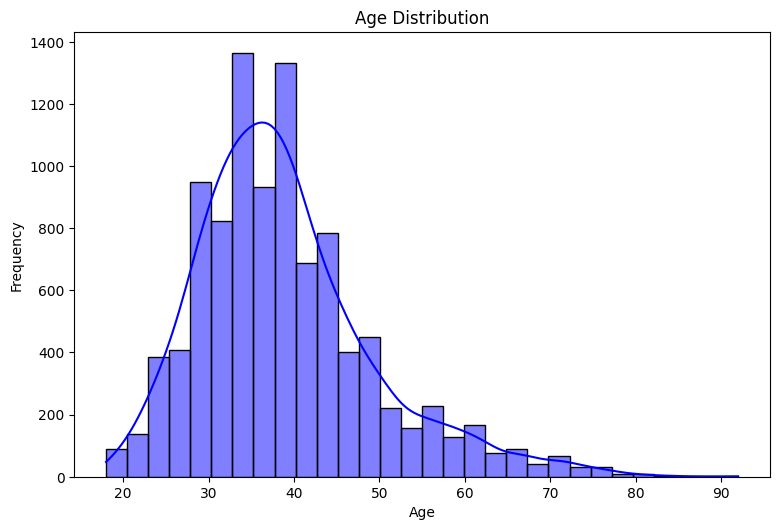

In [5]:
# General settings for charts
plt.figure(figsize=(15, 10))

# Age histogram
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show charts
plt.tight_layout()
plt.show()

- X-Axis (Age):

Represents the age of customers, ranging from 18 to 92 years.

- Y-Axis (Frequency):

Represents the number of customers (frequency) in each age group (bin).

- Bars:

Each bar corresponds to a specific age range (bin) and shows how many customers fall into that range.

##### Observations from the Histogram
- Peak Age Group:

The highest bars indicate the age groups with the most customers.

From the histogram, the peak appears to be around 30–40 years, suggesting this is the most common age group in the dataset.

- Spread of Ages:

The distribution shows a gradual decrease in frequency as age increases beyond the peak.

There are fewer customers in the 60+ age groups compared to younger age groups.

- Shape of the Distribution:

The histogram appears to be right-skewed, meaning there is a longer tail on the right side (older ages).

This indicates that while most customers are younger, there is still a significant number of older customers.

- Outliers:

The histogram shows some customers in the 80–90 age range, though the frequency is very low.

These could be considered outliers or less common in the dataset.

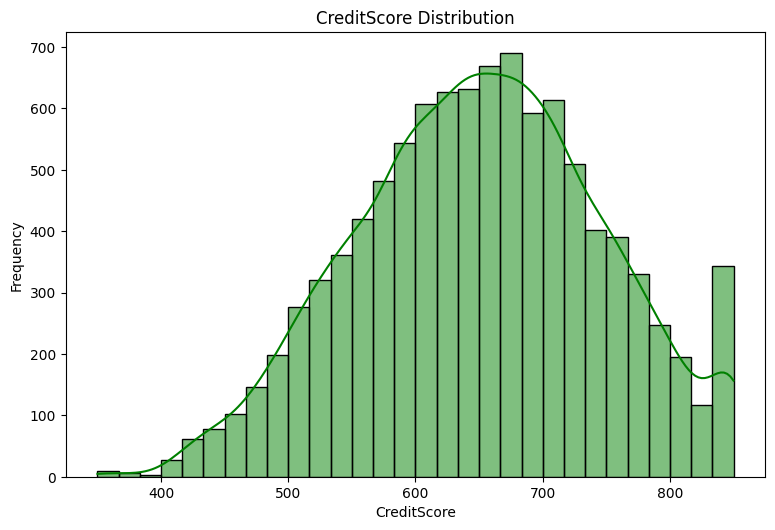

In [6]:
# General settings for charts
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='green')
plt.title('CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

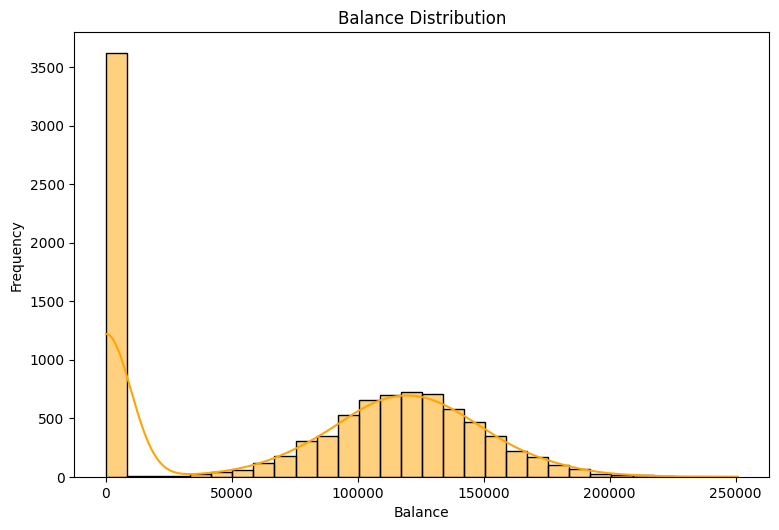

In [7]:
# Balance histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(df['Balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

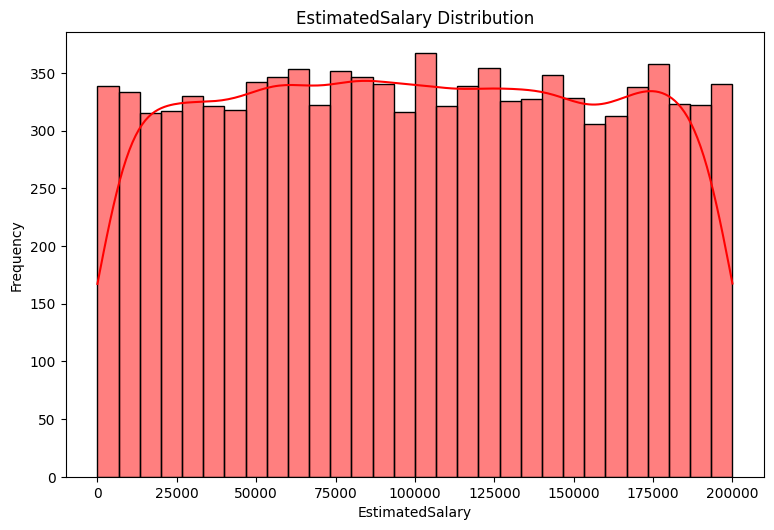

In [8]:
# EstimatedSalary histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='red')
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

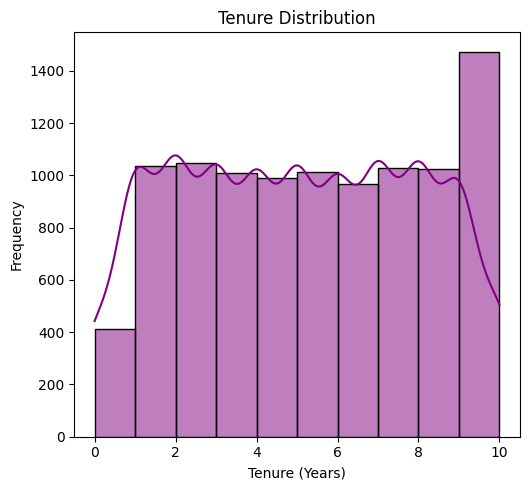

In [9]:
# Tenure histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Tenure'], bins=10, kde=True, color='purple')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

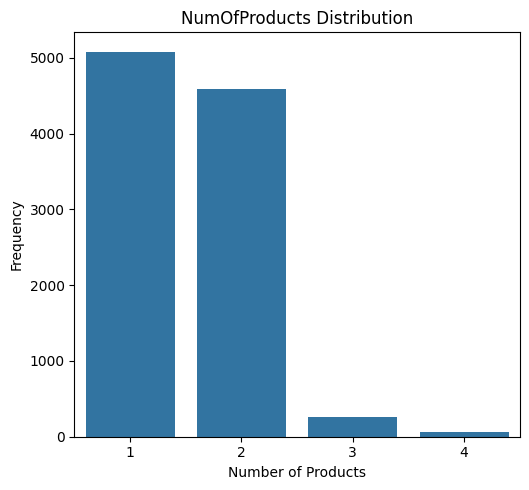

In [10]:
# NumOfProducts bar plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='NumOfProducts', data=df)
plt.title('NumOfProducts Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

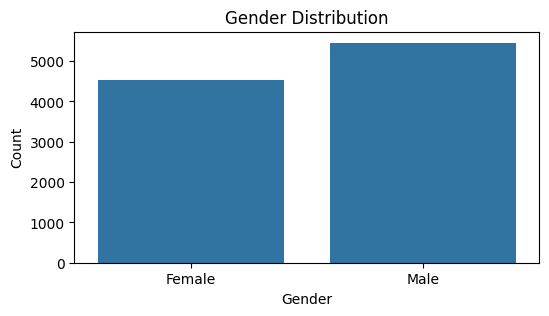

In [11]:
# Gende bar plot
plt.figure(figsize=(6, 3))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Data Cleaning
We do not need RowNumber, CustomerId, Surname and we drop them.

In [12]:
# Remove RowNumber, CustomerId, Surname
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

#### Converting non-numeric columns
We do not need 'Surname' column but 'Gender', 'Geography' are important for our model. So, we convert them to numeric values. 

In [13]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

print(df)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1          

#### Boxplots

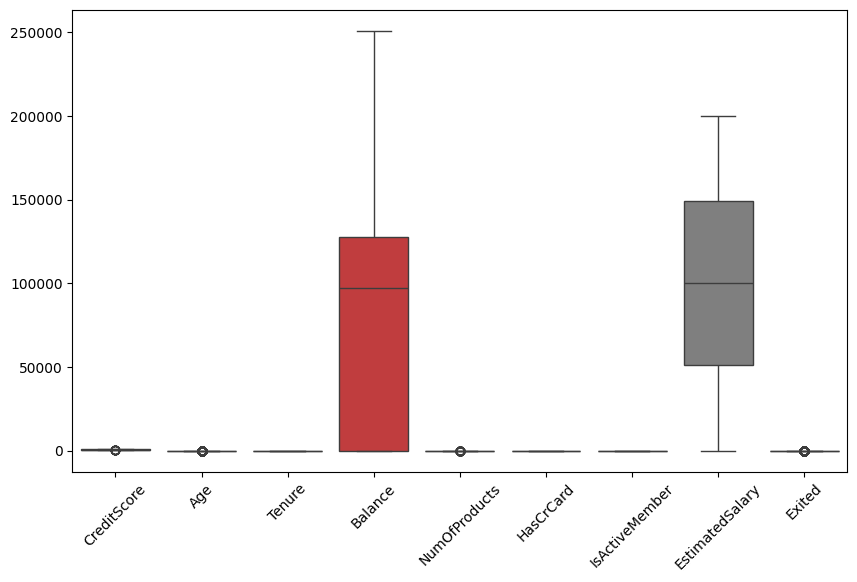

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.show()

- The circular points indicate outlier values.
- The features `Balance` and `EstimatedSalary` have a wider distribution.
- The features `CreditScore`, `Age`, `NumOfProducts`, have outlier values.
- The features `Tenure`, `HasCrCard`, `IsActiveMember` have almost no outlier values. These features have a more uniform distribution and fewer outlier values.

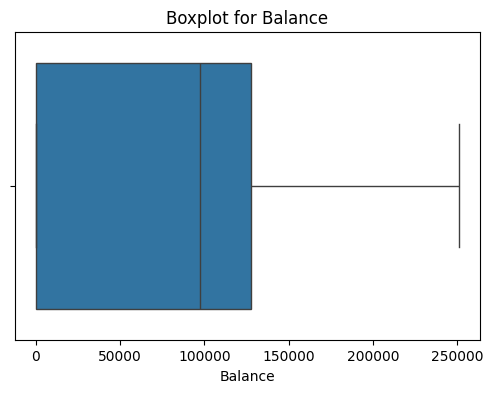

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Balance'])
plt.title("Boxplot for Balance")
plt.show()


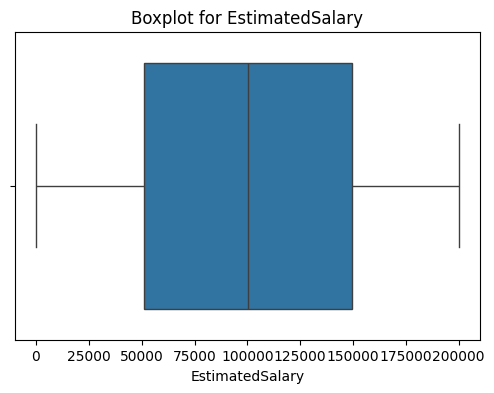

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['EstimatedSalary'])
plt.title("Boxplot for EstimatedSalary")
plt.show()

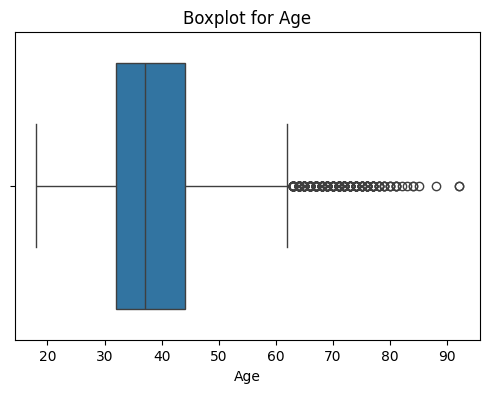

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot for Age")
plt.show()

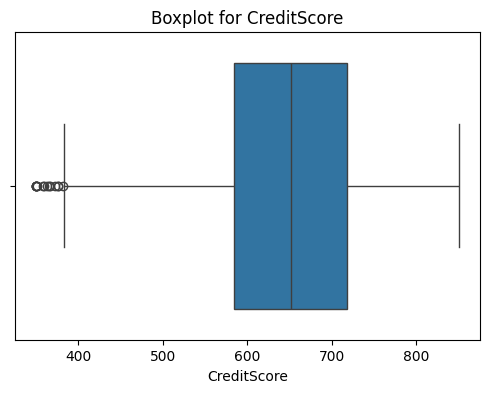

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['CreditScore'])
plt.title("Boxplot for CreditScore")
plt.show()

#### Handling outliers
In scaling methods, extremely large or small values are normalized to reduce their impact on the model. We use `RobustScaler`, a scaling technique provided by scikit-learn, to reduce the impact of outliers. It's particularly useful when our data contains outliers. Unlike StandardScaler, which uses the mean and standard deviation, RobustScaler uses the median and the interquartile range (IQR) to scale the data. This makes it more robust to outliers.

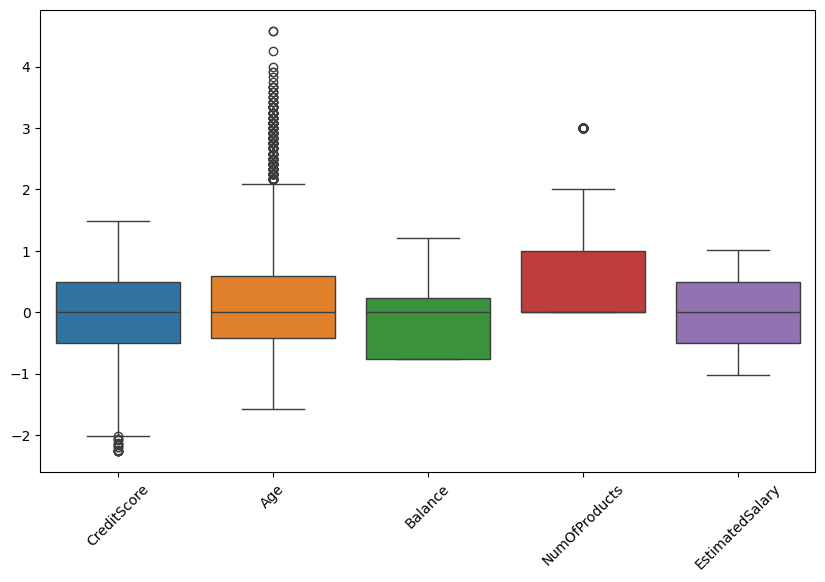

In [19]:
# Select the columns that need scaling
columns_to_scale = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Use RobustScaler to reduce the impact of outliers
scaler = RobustScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Show the boxplot after scaling
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_scale])
plt.xticks(rotation=45)
plt.show()

The data has been rescaled and its distribution has changed after applying `RobustScaler` techniques. This change is intended to improve the performance of models.

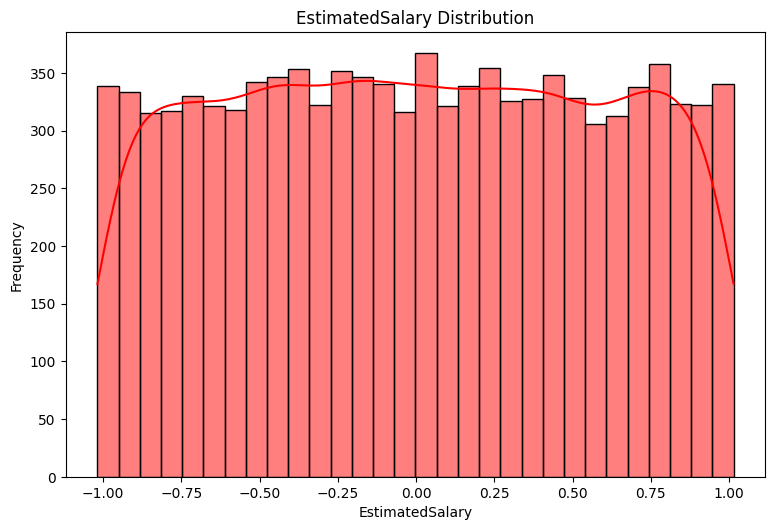

In [20]:
# EstimatedSalary histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='red')
plt.title('EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

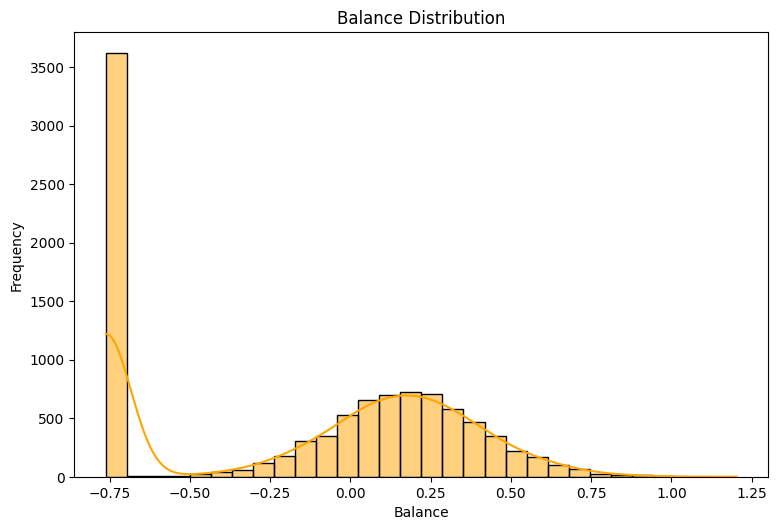

In [21]:
# Balance histogram
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(df['Balance'], bins=30, kde=True, color='orange')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

After scaling, we use sigma clipping to remove outliers from a dataset.

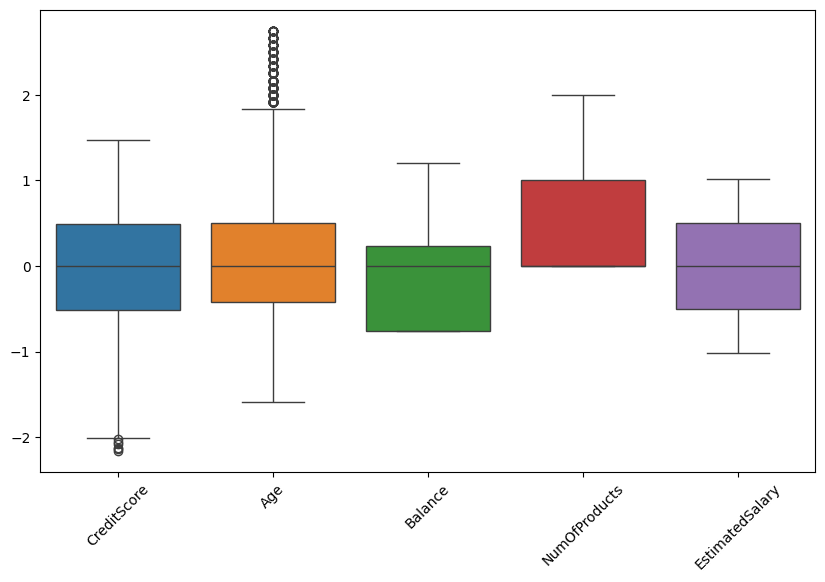

In [22]:
# Remove outliers using Sigma Clipping
def sigma_clipping(df, columns, sigma=3, maxiters=5):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - sigma * std
        upper_bound = mean + sigma * std
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df = sigma_clipping(df, columns_to_scale)

# Boxplot chart
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_scale])
plt.xticks(rotation=45)
plt.show()

The Boxplot shows that there are still outliers in some features. However, the impact of these outliers on the model has been reduced.

## Feature Engineering
We can perform Feature Engineering on your dataset to create new features that are useful in predicting churn.
### 1. Customer Engagement Score
- Combining the `IsActiveMember` and `HasCrCard` features
- Giving more value to customers who are active and have a credit card.
- Suggested formula:
$$Engagement_Score=IsActiveMember×2+HasCrCard$$
- Higher value = more active and engaged customer.

In [23]:
# Customer Engagement Score
df['Engagement_Score'] = df['IsActiveMember'] * 2 + df['HasCrCard']

### 2. Balance to Salary Ratio
- It measures how much of income the customer has in the bank.
- Suggested formula:
$$
{Balance\_Salary\_Ratio} = \frac{Balance}{EstimatedSalary}
$$
- A very high or low value may indicate risky behavior.

In [24]:
epsilon = 1e-6
# Balance to Salary Ratio
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + epsilon)  # Prevent division by zero

Save the processed dataset

In [25]:
# Save the processed dataset
df.to_csv('processed_churn.csv', index=False)

### Investigating the impact of new features
#### Comparing Customer Engagement Scores between retained and churned customers

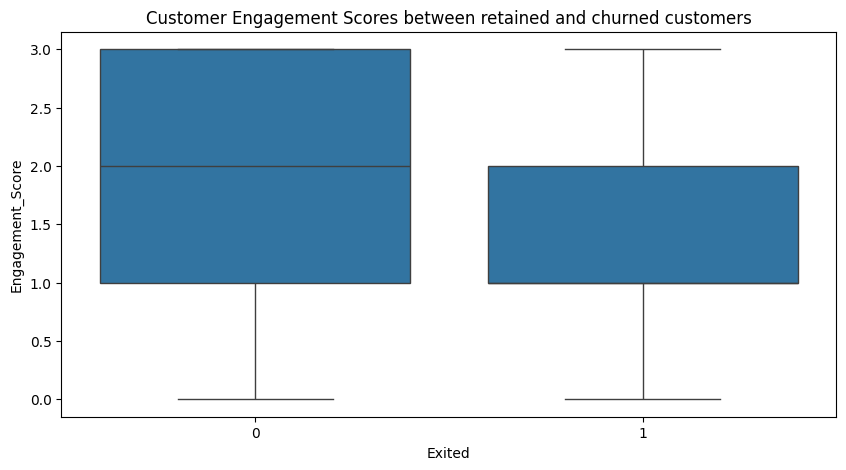

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Exited'], y=df['Engagement_Score'])
plt.title("Customer Engagement Scores between retained and churned customers")
plt.show()

Looking closely at the plot, we can see the following points:

- Difference in Mean: The mean customer engagement score for customers who stayed with the bank (Exited=0) is clearly higher than the mean engagement score for customers who left the bank (Exited=1). This shows that customers who interact more with the bank are less likely to leave the bank.

- Data Dispersion: The dispersion of the data (the length of the box and the lines around it) is almost the same in both groups. This shows that the variation in customer engagement scores is almost the same in both groups.

- Conclusion:
This graph clearly shows that there is a significant relationship between a customer’s engagement score and their exit status. In general, customers with higher engagement scores are less likely to leave the bank. This finding could be useful for banks to improve customer engagement and reduce churn rates.

#### Comparing Balance Salary Ratio between retained and churned customers

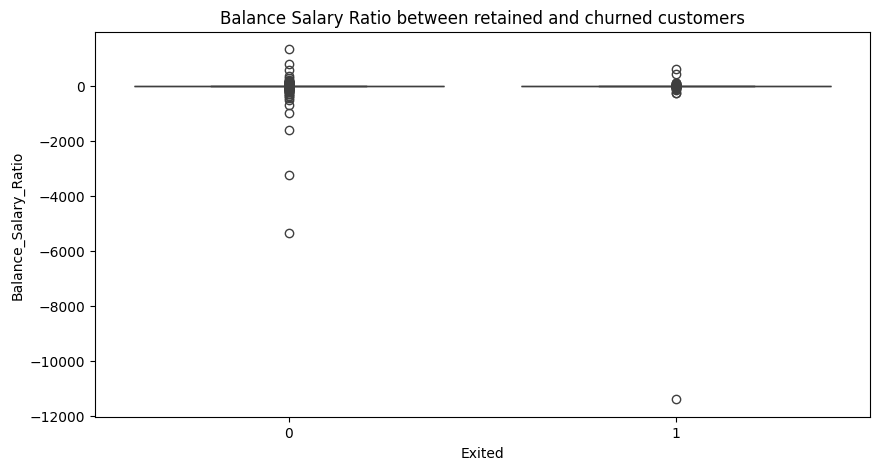

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Exited'], y=df['Balance_Salary_Ratio'])
plt.title("Balance Salary Ratio between retained and churned customers")
plt.show()

By looking carefully at the graph, we can see the following points:

- Distribution of points: In general, the distribution of points in the two groups (left and stayed) is very similar and there is not much difference in the dispersion of the data.

- Outliers: In both groups, there are outliers (points that are very far from the other points). These points indicate customers who have a very high or very low balance to salary ratio.

- Conclusion:
According to this graph, it does not seem that the "balance to salary ratio" alone can be an important factor in customer churn, because the distribution of this ratio is almost the same in both groups. This means that customers who left the bank and customers who stayed in the bank have, on average, similar balance to salary ratios.

## Model Development & Evaluation
### Split the data into training and testing sets
To train the model, we split the data into two parts: Train (80%) and Test (20%).

In [29]:
# Load the cleaned and resampled dataset
df = pd.read_csv('processed_churn.csv')

# Select features and target variable
X = df.drop(columns=['Exited'])  # Features
y = df['Exited']  # Target variable

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

`Stratify=y` ensures that the distribution of class values in the training and test sets is similar.

### Baseline Model
To start, we use simple models such as Logistic Regression or Gradient Boosting. These models are a good starting point and can be considered as a baseline model.

In [31]:
# Define and train a logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

- `random_state=42`: This is a crucial parameter for reproducibility. It sets the seed for the random number generator used internally by the Logistic Regression algorithm. By setting it to a fixed value (like 42), we ensure that if we run the code multiple times, we will get the same results. This is important for debugging, comparing models, and ensuring consistent results.
- `max_iter=1000`: This sets the maximum number of iterations the solver will use to converge. Logistic Regression uses an iterative optimization algorithm to find the best coefficients. If the algorithm doesn't converge within the specified number of iterations, it will stop.

### Model Evaluation

In [42]:
# Evaluation metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_pred_prob_lr),
    'Log Loss': log_loss(y_test, y_pred_prob_lr),
    'Matthews Correlation Coefficient': matthews_corrcoef(y_test, y_pred_lr)
}

# Show results
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

Accuracy: 0.8194
Precision: 0.6173
Recall: 0.2551
F1-Score: 0.3610
ROC-AUC: 0.7623
Log Loss: 0.4242
Matthews Correlation Coefficient: 0.3131


#### Additional Metrics

- Specificity (True Negative Rate): Out of all the customers who actually didn't churn, how many did the model correctly predict? Calculated as `True Negatives / (True Negatives + False Positives)`.  Important to consider when you want to accurately identify those who won't churn.

- Average Precision (AP): Summarizes the precision-recall curve into a single value.  Useful when you have a specific target for recall or precision.

- Cohen's Kappa: Measures the agreement between the model's predictions and the true labels, correcting for the possibility of agreement by chance.

- G-mean: The geometric mean of sensitivity and specificity. Useful when you want to balance performance on both classes.

- MCC (Matthews Correlation Coefficient): A balanced measure that takes into account true and false positives and negatives.  Generally considered a good metric for imbalanced datasets.

- Log Loss: Measuring the model's confidence in predicting classes

### Visualization
#### ROC Curve

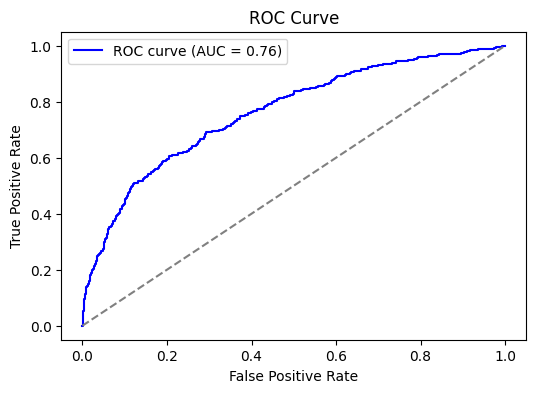

In [50]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # خط مرجع
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#### Confusion Matrix

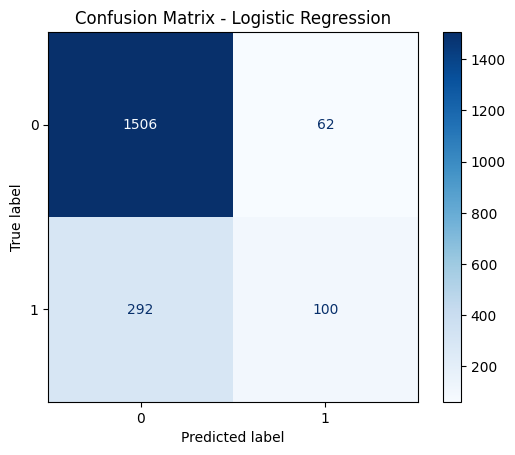

In [55]:
# Calculation Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#### Gradient Boosting

In [43]:
# Define and train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction on test data
y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]

##### Model Evaluation

In [44]:
# Evaluation metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1-Score': f1_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_prob_gb),
    'Log Loss': log_loss(y_test, y_pred_prob_gb),
    'Matthews Correlation Coefficient': matthews_corrcoef(y_test, y_pred_gb)
}

# Show results
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

Accuracy: 0.8638
Precision: 0.7451
Recall: 0.4847
F1-Score: 0.5873
ROC-AUC: 0.8613
Log Loss: 0.3385
Matthews Correlation Coefficient: 0.5270


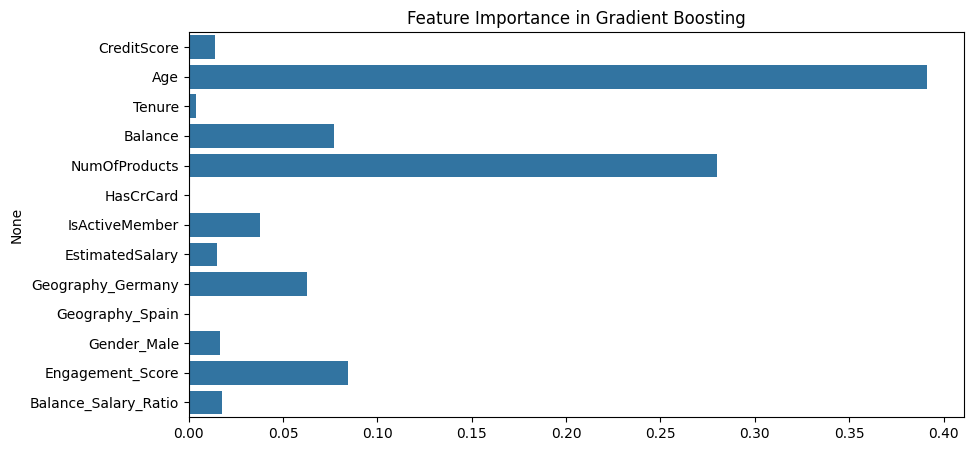

In [45]:
# Show Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=gb_model.feature_importances_, y=X.columns)
plt.title('Feature Importance in Gradient Boosting')
plt.show()

#### ROC Curve

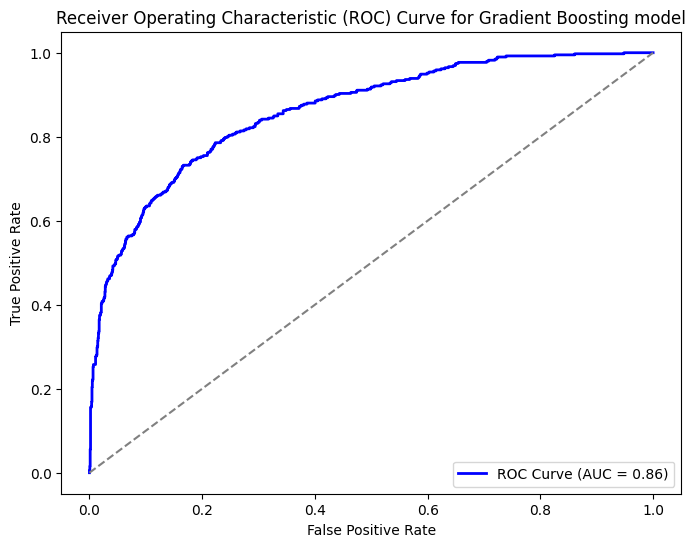

In [49]:
# Calculating FPR, TPR values to draw the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
roc_auc = auc(fpr, tpr)

# Show ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting model')
plt.legend(loc='lower right')
plt.show()

#### Confusion Matrix

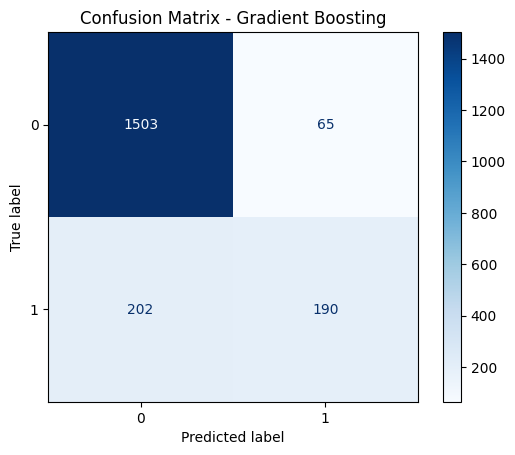

In [54]:
# Calculation Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()